<a href="https://colab.research.google.com/github/mwaura-k/Advertising-project-with-R/blob/main/Karen_Mwaura_fifa_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Define question

####a)Specify the question

You have been recruited as a football analyst in a company. Make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training)

####b)Success metrics

The project will be succesful when: 



*   We make a prediction of the game results between team 1 and 2 based on if the team is home or away and if the game is friendly or not.
*   The model used will achieve at least 75% accuracy.



####c)Understanding context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently being led by Belgium. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first. A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. 
The rankings are used by FIFA to rank the progression and current ability of the national football teams of its member nations, and claims that they create "a reliable measure for comparing national A-teams".They are used as part of the calculation, or the entire grounds to seed competitions.

####d)Record experimental design

#####a) Loading data

b) Data cleaning

c) Merging

d) Perform your EDA
#####e) Perform any necessary feature engineering 
#####f) Check of multicollinearity
#####g) Start building the model


h) Cross-validate the model

i) Compute RMSE

j) Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test


####e)Data relevance

There are two datasets; ranking and results dataset. Each of them play a part in answering the primary questions.They have appropriate columns to answer the questions

i) fifa_ranking dataset which shows the FIFA ranking and points for the teams from 1993 to 2018. It shows a monthly ranking of team performance

ii) results.csv dataset which contains International Soccer matches from 1872 to 2019. It shows teams, scores, tournament type and country the game was played from

Both our datasets consists of information on football rankings over time and are therefore suitable to create a model that will be used to predict the res


##Read data

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load ranks dataset
ranks=pd.read_csv('/content/fifa_ranking.csv')

# Preview first three records
ranks.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993


In [ ]:
# Preview last three records
ranks.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,6/7/2018


In [ ]:
# Preview the random sample
ranks.sample(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41025,27,Serbia,SRB,774.64,854,-4,359.70,359.70,379.61,189.80,507.54,152.26,364.41,72.88,UEFA,11/23/2011
22414,189,Philippines,PHI,0.00,106,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,AFC,2/18/2004
56342,27,Tunisia,TUN,838.34,838,0,462.33,462.33,371.57,185.78,267.41,80.22,549.99,110.00,CAF,12/21/2017


In [ ]:
# Load results dataset
results=pd.read_csv('/content/results.csv')

# Preview the first three records
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [ ]:
# Load last 3 records
results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,7/19/2019,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,7/19/2019,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,7/20/2019,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# View Sample data
results.sample(3) 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
26776,7/31/2004,Zambia,Mauritius,3,1,COSAFA Cup,Lusaka,Zambia,False
8476,2/21/1973,Spain,Greece,3,1,FIFA World Cup qualification,Málaga,Spain,False
25321,2/22/2003,Macau,Mongolia,2,0,EAFF Championship,So Kon Po,Hong Kong,True


In [ ]:
# number of rows and columns from both datasets
print("ranks.shape", ranks.shape)
print("results.shape", results.shape)

ranks.shape (57793, 16)
results.shape (40839, 9)


In [ ]:
# datatypes for ranks dataset
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# datatype for results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


###Data cleaning

In [ ]:
# check for null values on ranks dataset
ranks.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
# null values for results dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Results and ranks dataset has no missing values.

In [ ]:
# convert ranks attributes to appropriate datatypes
ranks['rank_date']=pd.to_datetime(ranks['rank_date'])

In [ ]:
# convert result attributes to appropriate datatypes
results['date']=pd.to_datetime(results['date'])

In [ ]:
# checking for ranks duplicates
print("ranks.duplicated", ranks.duplicated().sum())
print("results.duplicated", results.duplicated().sum())

ranks.duplicated 37
results.duplicated 0


In [ ]:
# drop the duplicates
ranks.drop_duplicates(inplace=True)

In [ ]:
# Check if duplicates were dropped
ranks.duplicated().sum()

0

In [ ]:
# Create column for month and years from ranks dataset
ranks['month']= ranks['rank_date'].dt.month
ranks['year'] = ranks['rank_date'].dt.year
ranks.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993


In [ ]:
# Create column for month and years from results dataset
results['month'] = results['date'].dt.month
results['year'] = results['date'].dt.year
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873


In [ ]:
#Rename column country_full in the ranks dataset to country
ranks.rename(columns = {'country_full': 'country'}, inplace=True)
ranks.head(1)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993


In [ ]:
#check year unique values for both datasets
print('ranks_year_unique\n',ranks.year.unique())
print('results_year_unique\n',results.year.unique())

ranks_year_unique
 [1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
results_year_unique
 [1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]


In [ ]:
# Dropping the years from 1872- Nov 1992
results= results.loc[results['year']>1992-11-30]
ranks=ranks.loc[ranks['year']>1992-11-30]

Ranking points started in the year 1992 December. We will use data from Dec 1992

In [ ]:
# Dropping year 2019 is equalize the datasets
results=results.loc[results['year']<2019]

In [ ]:
# Merge the datasets
#merge to get away rank
rank_away = pd.merge(ranks, results, left_on= ['year','month','country'], right_on= ['year','month','away_team'], how='inner')

#rename rank to away rank
rank_away = rank_away.rename({'rank':'away_rank'},axis=1)

#merge to get home rank
rank_home = pd.merge(ranks, results, left_on= ['year','month','country'], right_on= ['year','month','home_team'], how='inner')

#rename
rank_home = rank_home.rename({'rank':'home_rank'},axis=1)


#merge all
#merge all
data = pd.merge(rank_home, rank_away, how = 'inner', left_on = ['year','month','away_team'], right_on = ['year','month','away_team'])
data.shape

(28439, 51)

In [ ]:
# Preview record
data.head(3)

,home_rank,country_x_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,month,year,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country_y_x,neutral_x,away_rank,country_x_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y,date_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y_y,neutral_y
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-11,Sweden,1,2,Friendly,Borås,Sweden,False
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,12,France,FRA,0.0,45,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-22,Sweden,1,1,FIFA World Cup qualification,Solna,Sweden,False
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-15,Paraguay,2,1,FIFA World Cup qualification,Asunción,Paraguay,False


In [ ]:
# pick the necessary columns for study
df=data[['home_team_x','away_team', 'home_score_x', 'away_score_x', 'tournament_x','home_rank','away_rank']]
df

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,home_rank,away_rank
0,Sweden,Switzerland,1,2,Friendly,4,3
1,Sweden,France,1,1,FIFA World Cup qualification,4,12
2,Argentina,Peru,2,1,FIFA World Cup qualification,5,70
3,Argentina,Peru,2,1,FIFA World Cup qualification,5,70
4,Argentina,Peru,2,1,FIFA World Cup qualification,5,70
...,...,...,...,...,...,...,...
28434,Latvia,Estonia,1,0,Baltic Cup,129,94
28435,Angola,Malawi,0,0,COSAFA Cup,137,123
28436,Botswana,Mauritius,6,0,COSAFA Cup,139,155
28437,Lesotho,Zimbabwe,0,0,COSAFA Cup,147,118


In [ ]:
# rename columns
df.rename(columns={'home_team_x':'home_team', 'home_score_x':'home_score', 'away_score_x': 'away_score','tournament_x': 'tournament'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Sweden,Switzerland,1,2,Friendly,4,3
1,Sweden,France,1,1,FIFA World Cup qualification,4,12


<function matplotlib.pyplot.show>

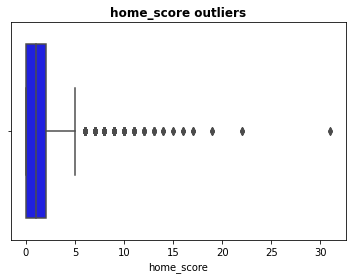

In [ ]:
# Determine outliers
# 
sns.boxplot(x= df['home_score'])
plt.title('home_score outliers', weight='bold')
plt.show

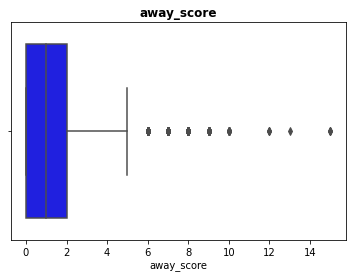

In [ ]:
# outliers for away scores
sns.boxplot( x=df["away_score"]);
plt.title('away_score', weight="bold")
plt.show()

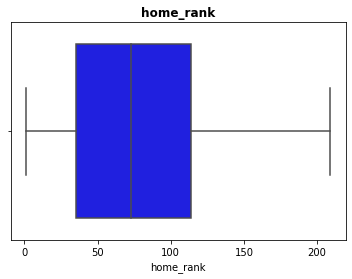

In [ ]:
# outliers for home_rank
sns.boxplot( x=df["home_rank"]);
plt.title('home_rank', weight='bold')
plt.show()

###Feature Engineering

In [ ]:
# #Creating a new column 'results' for win,draw,loose
def win_l_draw(w_l_d):
    if w_l_d['home_score'] == w_l_d['away_score']:
        return 'Draw'
    elif w_l_d['home_score'] > w_l_d['away_score']:
        return 'Win'
    else:
        return 'Lose'
    

df['status'] = df.apply(win_l_draw, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# check the unique values for tournament
df.tournament.unique()

array(['Friendly', 'FIFA World Cup qualification',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'UEFA Euro qualification',
       'CFU Caribbean Cup', 'Kirin Cup', 'FIFA World Cup', 'Baltic Cup',
       'Oceania Nations Cup qualification', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Dynasty Cup', "King's Cup",
       'SAFF Cup', 'Copa Paz del Chaco', 'USA Cup', 'Korea Cup',
       'Copa América', 'Merdeka Tournament', 'South Pacific Games',
       'UNCAF Cup', 'Oceania Nations Cup', 'Windward Islands Tournament',
       'Gold Cup', 'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'King Hassan II Tournament', 'AFC Asian Cup',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',
      

In [ ]:
# grouping tournament records to either fifa World cup, friendly and others
#group tournament records to either worldcup,friendly or other matches
def tournament(match_type):
    if (match_type == 'FIFA World Cup qualification') or (match_type == 'FIFA World Cup'):
        return 'World_Cup'
    if match_type == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'


df['match_type'] = df['tournament'].apply(lambda w: tournament(w))
df['match_type'].unique()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


array(['Friendly', 'World_Cup', 'Other Matches'], dtype=object)

In [ ]:
df.head(3)

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,status,match_type
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose,Friendly
1,Sweden,France,1,1,FIFA World Cup qualification,4,12,Draw,World_Cup
2,Argentina,Peru,2,1,FIFA World Cup qualification,5,70,Win,World_Cup


###EDA

In [ ]:
# Description of the data
df.describe()

,home_score,away_score,home_rank,away_rank
count,28439.000000,28439.000000,28439.000000,28439.000000
mean,1.596821,1.101445,78.387813,81.409192
std,1.635258,1.279389,51.097232,52.575171
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,35.000000,38.000000
50%,1.000000,1.000000,73.000000,76.000000
75%,2.000000,2.000000,114.000000,119.000000
max,31.000000,15.000000,209.000000,209.000000


<function matplotlib.pyplot.show>

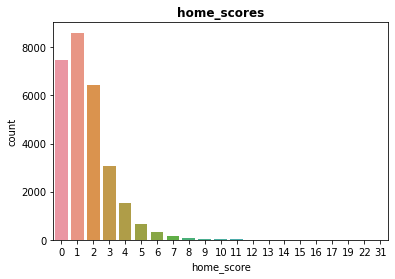

In [ ]:
# plotting a countplot
sns.countplot(x='home_score', data=df)
plt.title('home_scores', weight='bold')
plt.show

home scores fall under 1 goal. My thinking would be, the teams playing from home will try to defend their title.

<function matplotlib.pyplot.show>

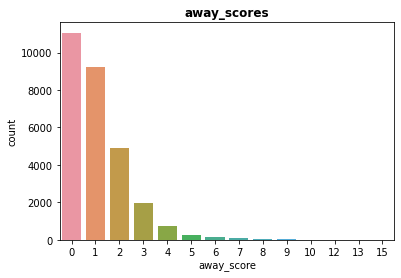

In [ ]:
# plotting a countplot
sns.countplot(x='away_score', data=df)
plt.title('away_scores', weight='bold')
plt.show

The away scores fall under 0, as the majority. Maybe because away games are tough to play due to reasons like: The team is not used to playing from a different field or they lack the motivation to play when they're away

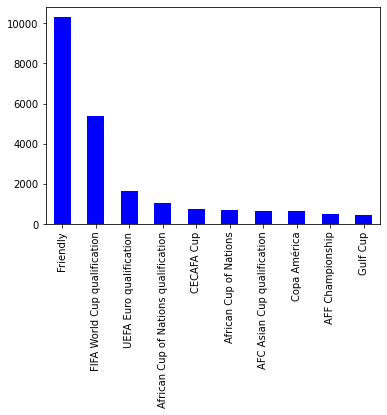

In [ ]:
# plotting a countplot
df.tournament.value_counts()[:10].plot(kind= 'bar')

From the above table, majority of the games are friendly games. My assumption is, the friendly games are common since the players use them to practise for the big games coming ahead.

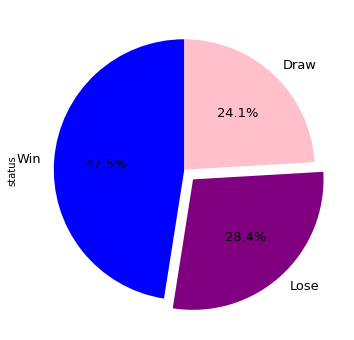

In [ ]:
#match results
colors = ['blue','purple','pink']
df['status'].value_counts().plot(kind='pie',figsize=(6,6),fontsize=13,autopct='%1.1f%%',explode=(0, 0.1,0),colors=colors,startangle=90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


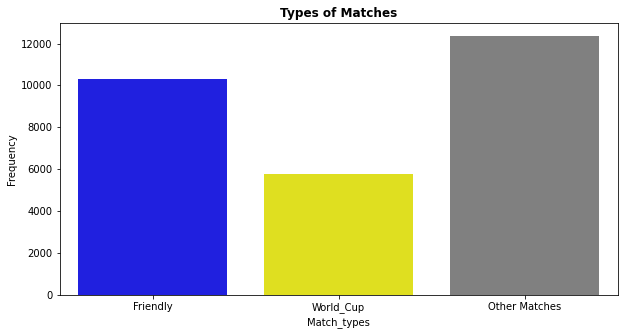

In [ ]:
#countplot showing tournament types
custom_palette = ['blue','yellow','grey']
plt.figure(figsize = (10, 5))
ax = sns.countplot(df.match_type)
sns.set_palette(custom_palette)
plt.ylabel('Frequency')
plt.xlabel('Match_types')
plt.title('Types of Matches',weight='bold')
plt.show()

# **`Regression`**

We are working using polynomial and logistic regression

approach 1: polynomial re


homescore

In [ ]:
df.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,status,match_type
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose,Friendly
1,Sweden,France,1,1,FIFA World Cup qualification,4,12,Draw,World_Cup
2,Argentina,Peru,2,1,FIFA World Cup qualification,5,70,Win,World_Cup
3,Argentina,Peru,2,1,FIFA World Cup qualification,5,70,Win,World_Cup
4,Argentina,Peru,2,1,FIFA World Cup qualification,5,70,Win,World_Cup


In [ ]:
# Predicting the home score
# check on multicollinearity
corr = df.drop('home_score', axis = 1).corr()
corr


,away_score,home_rank,away_rank
away_score,1.000000,0.221365,-0.151487
home_rank,0.221365,1.000000,0.515308
away_rank,-0.151487,0.515308,1.000000


In [ ]:
#  VIF dataframe
#
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
vif_df

,away_score,home_rank,away_rank
away_score,1.169618,-0.476835,0.422899
home_rank,-0.476835,1.555946,-0.874025
away_rank,0.422899,-0.874025,1.514456


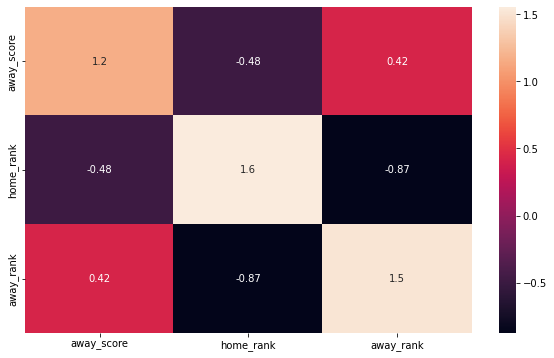

In [ ]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (10, 6))
sns.heatmap(vif_df, annot = True)
plt.show()


In [ ]:
# Creating X and y variables
#
X = df.iloc[:, [0, 1, 3, 4, 5, 6]]
y = df.home_score

# Encode(one hot encoding) categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Set train and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the polynomial features to  X_train and X_test
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
#
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
# Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.9850340803355929
Mean Squared Error: 1.8597976313357545
Root Mean Squared Error: 1.3637439757284922


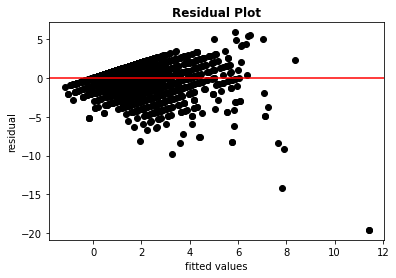

In [ ]:
#plot residual plot to assess correctness of the model
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot',weight='bold')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

In [ ]:
#perform a heteroscedasticity test using bartlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# #compute a critical value of the chi squared distribution
#for results interpretation
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


predicting away score

In [ ]:
# Creating X and y variables
#
X = df.iloc[:, [0, 1, 2, 4, 5, 6]]
y = df.home_score

# Encode(one hot encoding) categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Set train and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the polynomial features to  X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
#
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
# Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.50194655737945e-15
Mean Squared Error: 3.7917536251117195e-29
Root Mean Squared Error: 6.157721676977386e-15


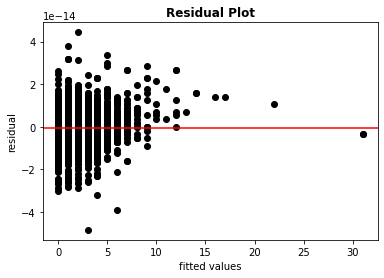

In [ ]:
#plot residual plot to assess correctness of the model
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot',weight='bold')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

approach2 Logistic Regression.

Create a model that can predict whether the home team will win, draw or lose

In [ ]:
#select relevant columns for this model
data = df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'home_rank', 'away_rank', 'status']]
data.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,status
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose
1,Sweden,France,1,1,FIFA World Cup qualification,4,12,Draw
2,Argentina,Peru,2,1,FIFA World Cup qualification,5,70,Win
3,Argentina,Peru,2,1,FIFA World Cup qualification,5,70,Win
4,Argentina,Peru,2,1,FIFA World Cup qualification,5,70,Win


In [ ]:
# Split the data into features and the target variable
#

from sklearn.linear_model import LogisticRegression
X = data.drop('status', axis = 1)
y = data.status

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Measuring the accuracy of the model
#
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn import metrics
print('The accuracy of the model is', accuracy_score(y_test, y_pred)*100,'%')

The accuracy of the model is 100.0 %


In [ ]:
#Checking precision:
#predictions = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Draw       1.00      1.00      1.00      2065
        Lose       1.00      1.00      1.00      2414
         Win       1.00      1.00      1.00      4053

    accuracy                           1.00      8532
   macro avg       1.00      1.00      1.00      8532
weighted avg       1.00      1.00      1.00      8532



####follow-up questions 

#####Did we have the right data?
The data was relevant to use, although not accurate.
It would have been appropriate to use external data for comparison

Did we have the right questions?

The questions were all relevant to the data provided